<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction to Machine Learning

<img src="ml.jpg">

## Definition

 * "Field of study that gives computers the ability to learn without being explicitly programmed"  1959, Arthur Samuel 
 * "Algorithms that can improve their performance using training data"

## Types of problems and tasks

<img src="supervised.png">
<img src="unsupervised.png">
<img src="semisupervised.png">

### Clustering

Examples:
1. Market research
2. Recommender systems
3. Social network analysis

#### K-Means

<img src="kmeans.gif">

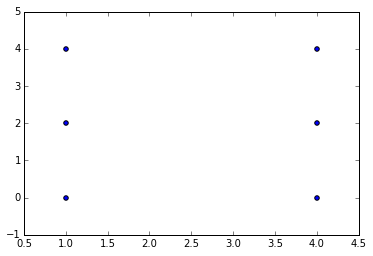

In [25]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
plt.scatter(X[:,0], X[:,1])
plt.show()

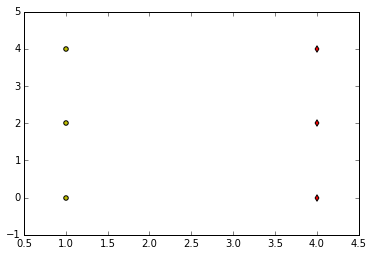

[0 0 0 1 1 1]
[0 1]
[[ 1.  2.]
 [ 4.  2.]]


In [28]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(X[0:3,0], X[0:3, 1], c='y')
plt.scatter(X[3:,0], X[3:, 1], c='r', marker='d')
plt.show()
print kmeans.labels_
print kmeans.predict([[0, 0], [4, 4]])
print kmeans.cluster_centers_

### Classification

Examples:
1. Spam detection
2. Cancer classification
3. Cats vs dogs

#### Decision Trees

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/



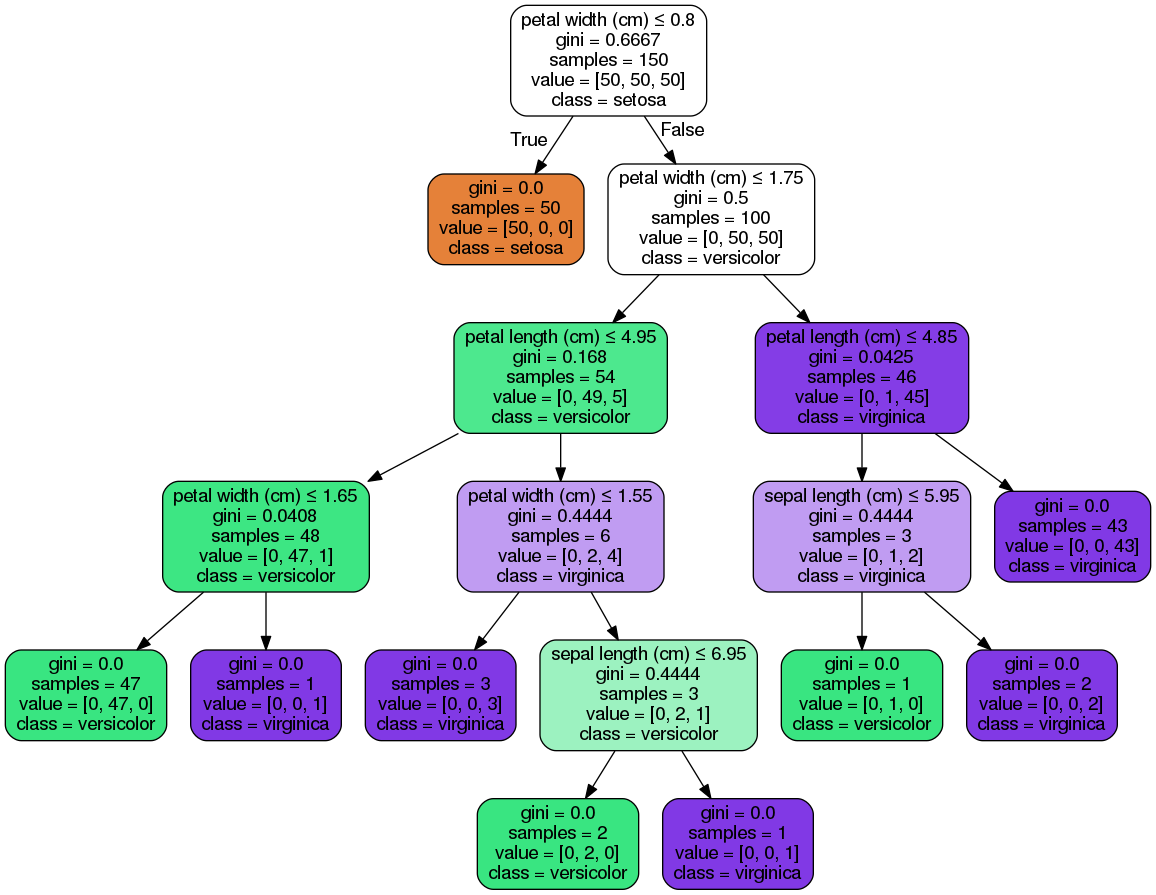

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

with open("iris.dot", 'w') as f:
     f = tree.export_graphviz(clf, out_file=f)
import os
os.unlink('iris.dot')

from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

#source: http://scikit-learn.org/stable/modules/tree.html

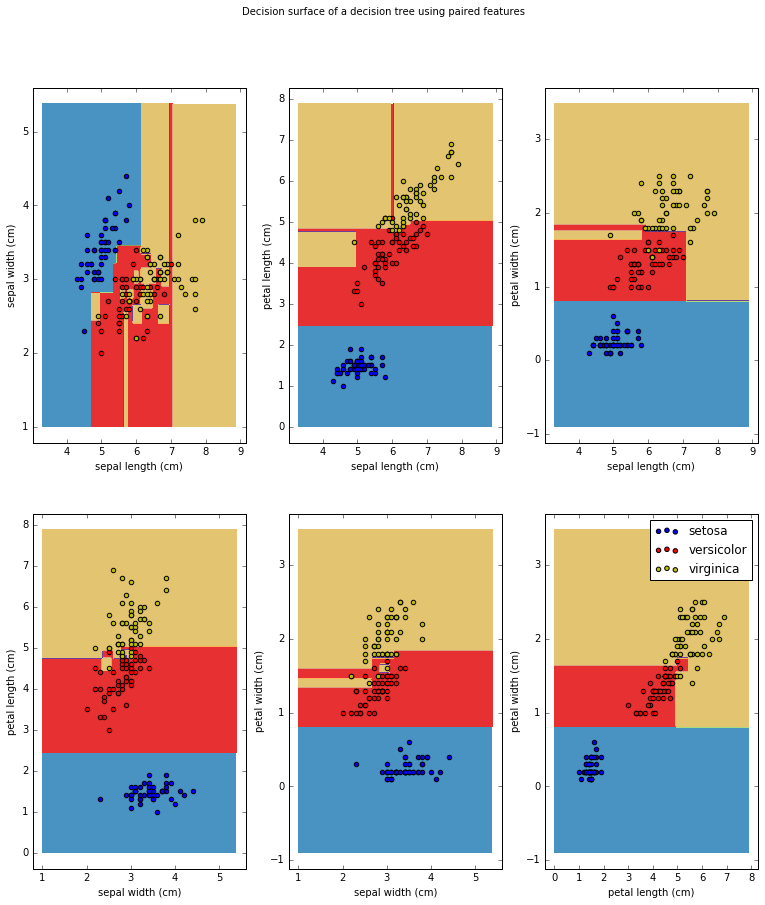

In [7]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

plt.figure(figsize=(13,14))

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

<img src="decisiontree.jpg">

### Regression

Examples:
1. Stock prices prediction
2. Computational biology: given protein sequence predict 3D structure
3. House prices prediction

#### Linear Regression

\begin{equation}
\hat{Y} = \hat{\beta}_0 + \hat{\beta} X
\end{equation}

#### Mean Squared Error

\begin{equation}
J(\beta)=\frac{1}{2m}(X\beta-\hat{Y})^T(X\beta-\hat{Y})
\end{equation}


<img src="lregression.gif" width="4500">

#### Overfitting vs Underfitting

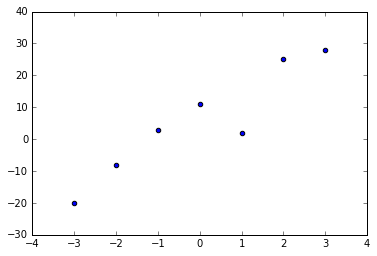

In [6]:
from sklearn import linear_model as lm
from random import randint
import matplotlib.pyplot as plt
import numpy as np

x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([p**3 + randint(0, 20) for p in x])
plt.scatter(x, y)
plt.show()

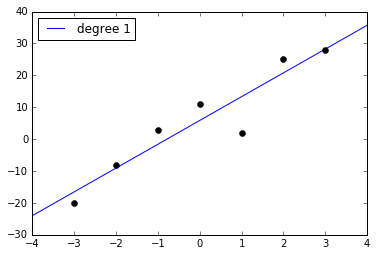

In [7]:
deg = 1
lr = lm.LinearRegression()
lr.fit(np.vander(x, deg + 1), y)
x_2 = np.linspace(-4, 4, 100)
y_2 = lr.predict(np.vander(x_2, deg + 1))
plt.plot(x_2, y_2, "b", label='degree ' + str(deg))
plt.legend(loc=2)
plt.plot(x, y, 'ok')
plt.show()

### Anomaly detection 

<img src="anomalies.png">

### Dimensionality reduction

<img src="Dimensionality.png">

### Bias-variance tradeoff

<img src="bias-and-variance.jpg">

#### Bias
\begin{equation}
Bias[\hat{f(x)}] = \mathbb{E}[\hat{f(x)} - f(x)]
\end{equation}

#### Variance
\begin{equation}
Var[\hat{f(x)}] = \mathbb{E}[\hat{f(x)}^2] - \mathbb{E}[\hat{f(x)}]^2
\end{equation}



## Applications

<img src="ml_applications.png">

## Neural Networks

<img src="neuron.jpg">

<img src="ann.png">

### Multi-layer Perceptron classifier - oldest NN
<img src="mlp.jpg">

### "A network is a hierarchical composition of nonlinear functions."
Output: real valued vector

### How to classify with a network?

* Softmax function - takes a vector of arbitrary real-valued scores and squashes it to a vector of values between zero and one that sum to one
* One-hot probability distribution
### Activation function
<img src="activation.png">
### How to learn a network: back-propagation
<img src="backpropagation.png">

<a href="http://bit.ly/2dX3Y7U">TensorFlow Neural Network Playground</a>

# Convolutional Neural Networks

* Image recognition and classification
* NLP - sequence classification

"ImageNet Classification with Deep Convolutional Neural Networks"

<img src="imagenet.jpg">

# Basic steps in CNN
1. Convolution
2. Non-linearity (ReLU)
3. Pooling or sub-sampling
4. Classification (fully connected layer)

## Convolution - extracting features from the input

#### Images are a matrix of pixel values

<img src="image.gif">

<img src="conv.gif">

# Non-linearity
Motivation: We want to learn mostly non-linear data (convolutions are linear operations)

\begin{equation}
Output = max(zero, input)
\end{equation}

<img src="relu.png">

# Pooling

Dimensionality reduction
<img src="max_pooling.png">

# Fully connected layer

MLP using a Softmax activation function
(high level features -> classes)
<img src="mlp.png">

# Full ConvNet
<img src="convnet.png">

Source: https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

# Chemioinformatics

## Chemical similarity and molecular fingerprints

* Similarity based on structural or functional qualities
* How to quantify similarity?

<img src="xoi.png">
<center>(inhibitory oksydazy ksantynowej)</center>

<b>The fingerprinting algorithm</b> examines the molecule and generates the following:

* a pattern for each atom
* a pattern representing each atom and its nearest neighbors (plus the bonds that join them)
* a pattern representing each group of atoms and bonds connected by paths up to 2 bonds long
* atoms and bonds connected by paths up to 3 bonds long
* and so on

<img src="fingerprint.png">
<img src="fingerprint2.png">

Example
$$OC=CN$$
<img src="example_fingerprint.jpg">

Source: http://www.daylight.com/dayhtml/doc/theory/theory.finger.html, http://infochim.u-strasbg.fr/CS3/program/material/Bajorath.pdf

## Circular fingerprints

* hashed
* not paths, but environment of atom up to a radius
* widely used for full structure similarity searching (not suitable for substructures)

<img src="circular_fingerprint.jpg">

# Convolutional Networks on Graphs for Learning Molecular Fingerprints

## From circular fingerprint to Convolutional Neural Network:
### Original molecule represented by graph:
* atoms $\rightarrow$ vertices
* bonds $\rightarrow$ edges
<img src="molecules-graph.gif">
### Hashing
#### Circular fingerprint:
* the hash function is applied at each layer of circular fingerprint
* purpose: combine information about each atom and neighborhood
* any change will lead to different output
#### cNN:
* replaced with <b>single layer of nn</b>
* smooth function - activation is similar when changes are unimportant
### Indexing
#### Circular fingerprint:
* used to combine all the nodes' feature vectors into a single fingerprint
* each node sets bit to 1 at an index determined by hash function
#### cNN:
* replaced with <b>softmax</b>
* atom classifies itself to category, sum of classification label vectors = final fingerprint

### Differences between pseudocode of circular fingerprints and neural graph fingerprints
<img src="algorithms.png">

## Experiments (neural fingerprints with large random weights are like circular fingerprints)
### Distances between fingerprints
Distance was measured using a continous generalization of the Tanimoto (Jaccard) similarity measure.
$$distance(x, y) = 1 - \frac{\langle x | y\rangle}{\langle x | x \rangle + \langle y | y \rangle - \langle x | y \rangle}$$
<img src="distance.png" width="500">
### Predictive performance
<img src="performance.png" width="500">
<img src="performance2.png">

## Interpretability


## Advantages (over fixed fingerprint):
* predictive performance
* parsimony
* interpretability